In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import time
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_error,log_loss
import sys
from gammli.gammli import GAMMLI
from gammli.dataReader import data_initialize
from gammli.utils import local_visualize
from gammli.utils import global_visualize_density
from gammli.utils import feature_importance_visualize
from gammli.utils import plot_trajectory
from gammli.utils import plot_regularization
import tensorflow as tf

data= pd.read_csv('data/University/University.csv')
task_type = "Classification"

In [2]:
list1 = data.columns
meta_info = OrderedDict()
for i in list1:
    meta_info[i]={'type': 'continues','source':'user'}
meta_info['major']={"type":"categorical",'source':'user'}
meta_info['program']={"type":"categorical",'source':'user'}
meta_info['department'] = {"type":"categorical",'source':'user'}
meta_info['ugCollege'] = {"type":"categorical",'source':'user'}

meta_info['ranking'] = {'type': 'continues','source':'item'}
meta_info['PublicOrNot'] = {'type': 'categorical','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
train , test = train_test_split(data,test_size=0.2 ,random_state=0)
tr_x, tr_Xi, tr_y, tr_idx, te_x, te_Xi, te_y, val_x, val_Xi, val_y, val_idx, meta_info, model_info ,sy,sy_t= data_initialize(train,test,meta_info,task_type ,'warm', 0, True)


model = GAMMLI(wc='warm',model_info=model_info, meta_info=meta_info, subnet_arch=[20, 10],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=min(500, int(0.2*tr_x.shape[0])), lr_bp=0.001, auto_tune=False,
               interaction_epochs=200,main_effect_epochs=500,tuning_epochs=300,loss_threshold_main=0,loss_threshold_inter=0,
              verbose=True, early_stop_thres=20,interact_num=10,n_power_iterations=5,n_oversamples=10, u_group_num=11, i_group_num=3, reg_clarity=0.0001,lambda_ =3,
              mf_training_iters=200,change_mode=False,convergence_threshold=0.001,max_rank=3,interaction_restrict='intra', si_approach ='als')
model.fit(tr_x, val_x, tr_y, val_y, tr_Xi, val_Xi, tr_idx, val_idx)

test cold start user: 995
test cold start item: 0
validation cold start user: 551
validation cold start item: 0
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.67873, val loss: 0.67862
Main effects training epoch: 2, train loss: 0.66268, val loss: 0.66193
Main effects training epoch: 3, train loss: 0.65398, val loss: 0.65244
Main effects training epoch: 4, train loss: 0.64699, val loss: 0.64507
Main effects training epoch: 5, train loss: 0.64166, val loss: 0.63948
Main effects training epoch: 6, train loss: 0.63716, val loss: 0.63495
Main effects training epoch: 7, train loss: 0.63404, val loss: 0.63173
Main effects training epoch: 8, train loss: 0.63182, val loss: 0.62960
Main effects training epoch: 9, train loss: 0.63052, val loss: 0.62825
Main effects training epoch: 10, train loss: 0.62962, val loss: 0.62756
Main effects training epoch: 11, train loss: 0.62959, v

Fine tuning epoch: 1, train loss: 0.63330, val loss: 0.62913
Fine tuning epoch: 2, train loss: 0.63319, val loss: 0.62916
Fine tuning epoch: 3, train loss: 0.63355, val loss: 0.62926
Fine tuning epoch: 4, train loss: 0.63320, val loss: 0.62923
Fine tuning epoch: 5, train loss: 0.63322, val loss: 0.62919
Fine tuning epoch: 6, train loss: 0.63339, val loss: 0.62942
Fine tuning epoch: 7, train loss: 0.63316, val loss: 0.62908
Fine tuning epoch: 8, train loss: 0.63322, val loss: 0.62899
Fine tuning epoch: 9, train loss: 0.63316, val loss: 0.62910
Fine tuning epoch: 10, train loss: 0.63314, val loss: 0.62907
Fine tuning epoch: 11, train loss: 0.63317, val loss: 0.62918
Fine tuning epoch: 12, train loss: 0.63316, val loss: 0.62913
Fine tuning epoch: 13, train loss: 0.63336, val loss: 0.62908
Fine tuning epoch: 14, train loss: 0.63322, val loss: 0.62920
Fine tuning epoch: 15, train loss: 0.63320, val loss: 0.62900
Fine tuning epoch: 16, train loss: 0.63315, val loss: 0.62911
Fine tuning epoch

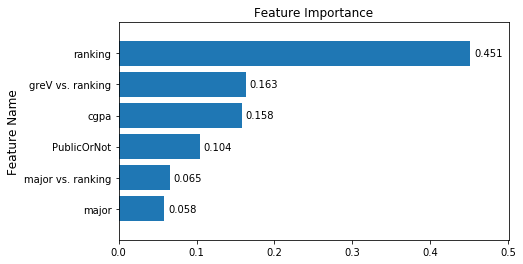

In [8]:
data_dict = model.final_gam_model.global_explain(save_dict=False)
feature_importance_visualize(data_dict, save_eps=True, folder=simu_dir, name='s1_feature')

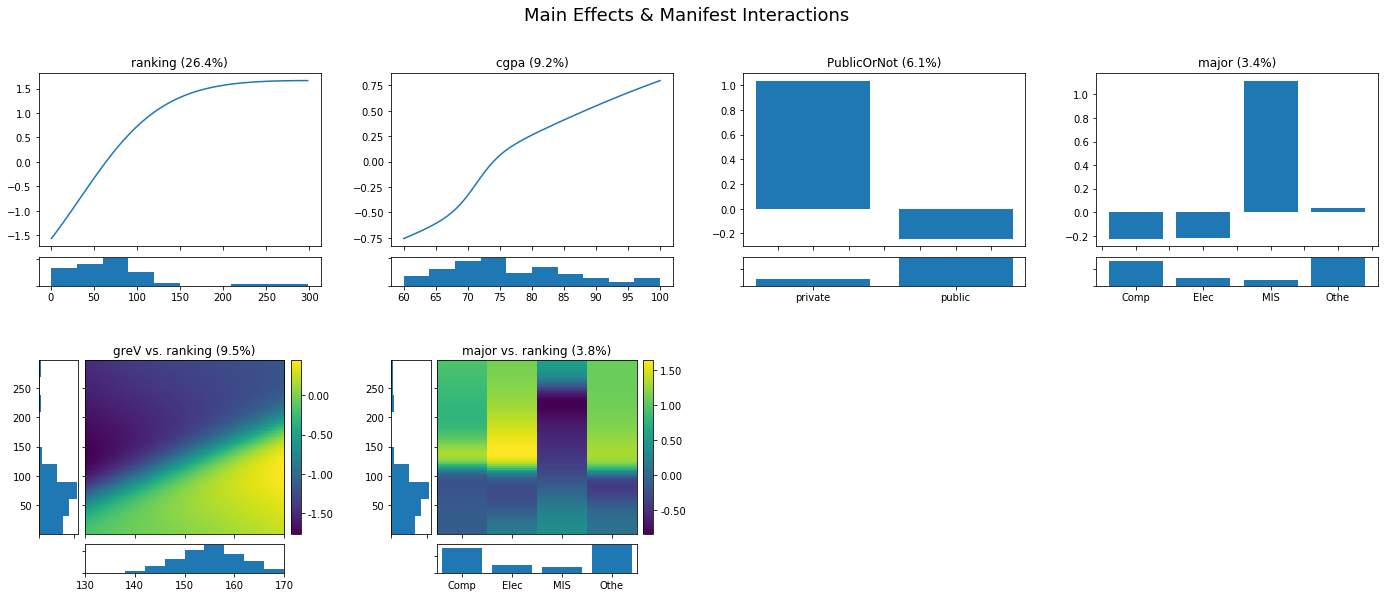

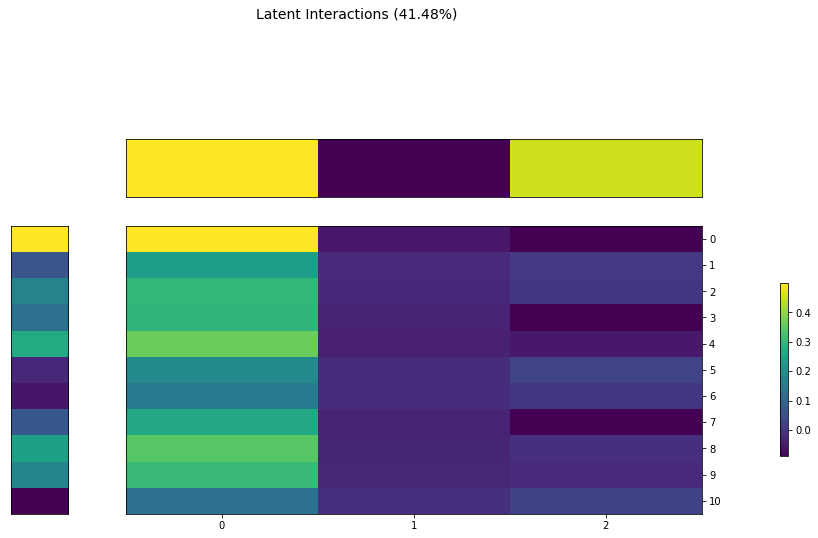

In [9]:
importance = model.get_all_rank(tr_Xi)
model.dash_board(data_dict, importance,simu_dir,True)

In [17]:
model.i_group_model.cluster_centers_

array([[-2.22044605e-16,  6.43939392e-02],
       [ 1.00000000e+00,  2.25292136e-01],
       [ 1.00000000e+00,  8.65319863e-01]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


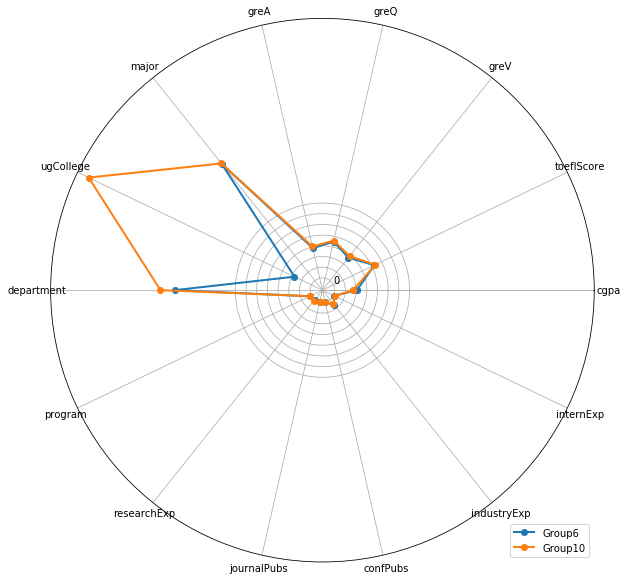

In [13]:
model.radar_plot(ui_type='user', group_index=[6,10],save_eps=True)

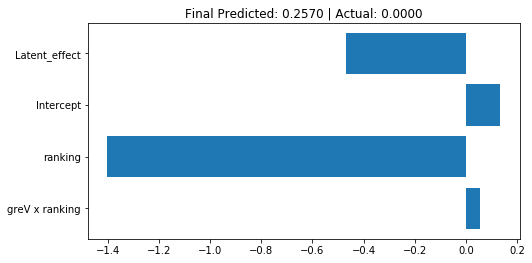

In [8]:
data_dict_local = model.local_explain(0,7,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_eps=True, folder=simu_dir, name='s1_local',task_type="Classification")